In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [4]:
full_df = pd.read_excel("dataset.xlsx")
full_df.head()

,ID,Name,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,AB0001,Priya Patel,58,M,Health Insurance,68668.48,429.30,7412.89,Basic,648,Single,27-04-2014,No
1,AB0002,Rohan Desai,63,M,Life Insurance,68970.72,1757.39,10083.20,Standard,650,Single,15-05-2014,Yes
2,AB0003,Neha Agarwal,54,F,Life Insurance,68156.42,290.84,5205.74,Basic,645,Single,23-03-2015,Yes
3,AB0004,Amit Patel,48,M,Health Insurance,53127.39,1077.28,7966.00,Basic,548,Married,2018-03-05 00:00:00,Yes
4,AB0005,Pooja Agarwal,35,M,Health Insurance,60871.42,723.11,9007.93,Standard,598,Married,22-09-2020,No


In [5]:
cols_to_drop = ['ID' , "Name"]
df = full_df.drop(cols_to_drop , axis = 1)
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,58,M,Health Insurance,68668.48,429.30,7412.89,Basic,648,Single,27-04-2014,No
1,63,M,Life Insurance,68970.72,1757.39,10083.20,Standard,650,Single,15-05-2014,Yes
2,54,F,Life Insurance,68156.42,290.84,5205.74,Basic,645,Single,23-03-2015,Yes
3,48,M,Health Insurance,53127.39,1077.28,7966.00,Basic,548,Married,2018-03-05 00:00:00,Yes
4,35,M,Health Insurance,60871.42,723.11,9007.93,Standard,598,Married,22-09-2020,No


In [6]:
gender_mapper = {"F" : 0 , "M" : 1}
df['Gender'] = df['Gender'].map(gender_mapper)
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,58,1,Health Insurance,68668.48,429.30,7412.89,Basic,648,Single,27-04-2014,No
1,63,1,Life Insurance,68970.72,1757.39,10083.20,Standard,650,Single,15-05-2014,Yes
2,54,0,Life Insurance,68156.42,290.84,5205.74,Basic,645,Single,23-03-2015,Yes
3,48,1,Health Insurance,53127.39,1077.28,7966.00,Basic,548,Married,2018-03-05 00:00:00,Yes
4,35,1,Health Insurance,60871.42,723.11,9007.93,Standard,598,Married,22-09-2020,No


In [7]:
df['Plan Type'].value_counts()

Plan Type
Basic       44476
Standard    10317
Premium       207
Name: count, dtype: int64

In [8]:
plan_mapper = {"Basic" : 1 , "Standard" : 2 , "Premium" : 3}
df['Plan Type'] = df["Plan Type"].map(plan_mapper)

In [9]:
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,58,1,Health Insurance,68668.48,429.30,7412.89,1,648,Single,27-04-2014,No
1,63,1,Life Insurance,68970.72,1757.39,10083.20,2,650,Single,15-05-2014,Yes
2,54,0,Life Insurance,68156.42,290.84,5205.74,1,645,Single,23-03-2015,Yes
3,48,1,Health Insurance,53127.39,1077.28,7966.00,1,548,Married,2018-03-05 00:00:00,Yes
4,35,1,Health Insurance,60871.42,723.11,9007.93,2,598,Married,22-09-2020,No


In [10]:
married_mapper = {"Single" : 0 , "Married" : 1}
df['Marital Status'] = df['Marital Status'].map(married_mapper)
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,58,1,Health Insurance,68668.48,429.30,7412.89,1,648,0,27-04-2014,No
1,63,1,Life Insurance,68970.72,1757.39,10083.20,2,650,0,15-05-2014,Yes
2,54,0,Life Insurance,68156.42,290.84,5205.74,1,645,0,23-03-2015,Yes
3,48,1,Health Insurance,53127.39,1077.28,7966.00,1,548,1,2018-03-05 00:00:00,Yes
4,35,1,Health Insurance,60871.42,723.11,9007.93,2,598,1,22-09-2020,No


In [11]:
def good_credit(credit):
    return int(credit > 640)
df['Credit Score'] = df['Credit Score'].apply(good_credit)
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,58,1,Health Insurance,68668.48,429.30,7412.89,1,1,0,27-04-2014,No
1,63,1,Life Insurance,68970.72,1757.39,10083.20,2,1,0,15-05-2014,Yes
2,54,0,Life Insurance,68156.42,290.84,5205.74,1,1,0,23-03-2015,Yes
3,48,1,Health Insurance,53127.39,1077.28,7966.00,1,0,1,2018-03-05 00:00:00,Yes
4,35,1,Health Insurance,60871.42,723.11,9007.93,2,0,1,22-09-2020,No


In [12]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'] , dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Age                        55000 non-null  int64         
 1   Gender                     55000 non-null  int64         
 2   Insurance Type             55000 non-null  object        
 3   Earnings ($)               55000 non-null  float64       
 4   Claim Amount ($)           55000 non-null  float64       
 5   Insurance Plan Amount ($)  55000 non-null  float64       
 6   Plan Type                  55000 non-null  int64         
 7   Credit Score               55000 non-null  int64         
 8   Marital Status             55000 non-null  int64         
 9   Policy Start Date          55000 non-null  datetime64[ns]
 10  Churn                      55000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage:

In [13]:
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn
0,58,1,Health Insurance,68668.48,429.30,7412.89,1,1,0,2014-04-27,No
1,63,1,Life Insurance,68970.72,1757.39,10083.20,2,1,0,2014-05-15,Yes
2,54,0,Life Insurance,68156.42,290.84,5205.74,1,1,0,2015-03-23,Yes
3,48,1,Health Insurance,53127.39,1077.28,7966.00,1,0,1,2018-03-05,Yes
4,35,1,Health Insurance,60871.42,723.11,9007.93,2,0,1,2020-09-22,No


In [14]:
df['days_passed'] = (pd.Timestamp.today() - df['Policy Start Date']).dt.days
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn,days_passed
0,58,1,Health Insurance,68668.48,429.30,7412.89,1,1,0,2014-04-27,No,3971
1,63,1,Life Insurance,68970.72,1757.39,10083.20,2,1,0,2014-05-15,Yes,3953
2,54,0,Life Insurance,68156.42,290.84,5205.74,1,1,0,2015-03-23,Yes,3641
3,48,1,Health Insurance,53127.39,1077.28,7966.00,1,0,1,2018-03-05,Yes,2563
4,35,1,Health Insurance,60871.42,723.11,9007.93,2,0,1,2020-09-22,No,1631


In [15]:
future_loans_index = (df.loc[df['days_passed'] <= 0]).index

In [16]:
#dropping the cols with future references
df.drop(future_loans_index , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54928 entries, 0 to 54999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Age                        54928 non-null  int64         
 1   Gender                     54928 non-null  int64         
 2   Insurance Type             54928 non-null  object        
 3   Earnings ($)               54928 non-null  float64       
 4   Claim Amount ($)           54928 non-null  float64       
 5   Insurance Plan Amount ($)  54928 non-null  float64       
 6   Plan Type                  54928 non-null  int64         
 7   Credit Score               54928 non-null  int64         
 8   Marital Status             54928 non-null  int64         
 9   Policy Start Date          54928 non-null  datetime64[ns]
 10  Churn                      54928 non-null  object        
 11  days_passed                54928 non-null  int64         
dtypes: dateti

In [17]:
churn_map = {"No" : 0 , "Yes" : 1}
df['Churn'] = df['Churn'].map(churn_map)
df.head()

,Age,Gender,Insurance Type,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn,days_passed
0,58,1,Health Insurance,68668.48,429.30,7412.89,1,1,0,2014-04-27,0,3971
1,63,1,Life Insurance,68970.72,1757.39,10083.20,2,1,0,2014-05-15,1,3953
2,54,0,Life Insurance,68156.42,290.84,5205.74,1,1,0,2015-03-23,1,3641
3,48,1,Health Insurance,53127.39,1077.28,7966.00,1,0,1,2018-03-05,1,2563
4,35,1,Health Insurance,60871.42,723.11,9007.93,2,0,1,2020-09-22,0,1631


In [18]:
int_df = df.drop("Insurance Type" , axis = 1)
str_df = df['Insurance Type']

In [19]:
encoded_str_df = pd.get_dummies(str_df).astype('int64')
encoded_str_df

,Automobile Insurance,Health Insurance,Life Insurance
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
54995,1,0,0
54996,1,0,0
54997,1,0,0
54998,0,1,0


In [20]:
df = pd.concat([int_df , encoded_str_df] , axis = 1)

In [21]:
df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Policy Start Date,Churn,days_passed,Automobile Insurance,Health Insurance,Life Insurance
0,58,1,68668.48,429.30,7412.89,1,1,0,2014-04-27,0,3971,0,1,0
1,63,1,68970.72,1757.39,10083.20,2,1,0,2014-05-15,1,3953,0,0,1
2,54,0,68156.42,290.84,5205.74,1,1,0,2015-03-23,1,3641,0,0,1
3,48,1,53127.39,1077.28,7966.00,1,0,1,2018-03-05,1,2563,0,1,0
4,35,1,60871.42,723.11,9007.93,2,0,1,2020-09-22,0,1631,0,1,0


In [22]:
df.drop(['Policy Start Date'] , axis = 1 , inplace = True)
df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Churn,days_passed,Automobile Insurance,Health Insurance,Life Insurance
0,58,1,68668.48,429.30,7412.89,1,1,0,0,3971,0,1,0
1,63,1,68970.72,1757.39,10083.20,2,1,0,1,3953,0,0,1
2,54,0,68156.42,290.84,5205.74,1,1,0,1,3641,0,0,1
3,48,1,53127.39,1077.28,7966.00,1,0,1,1,2563,0,1,0
4,35,1,60871.42,723.11,9007.93,2,0,1,0,1631,0,1,0


In [23]:
df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Plan Type,Credit Score,Marital Status,Churn,days_passed,Automobile Insurance,Health Insurance,Life Insurance
0,58,1,68668.48,429.30,7412.89,1,1,0,0,3971,0,1,0
1,63,1,68970.72,1757.39,10083.20,2,1,0,1,3953,0,0,1
2,54,0,68156.42,290.84,5205.74,1,1,0,1,3641,0,0,1
3,48,1,53127.39,1077.28,7966.00,1,0,1,1,2563,0,1,0
4,35,1,60871.42,723.11,9007.93,2,0,1,0,1631,0,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54928 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        54928 non-null  int64  
 1   Gender                     54928 non-null  int64  
 2   Earnings ($)               54928 non-null  float64
 3   Claim Amount ($)           54928 non-null  float64
 4   Insurance Plan Amount ($)  54928 non-null  float64
 5   Plan Type                  54928 non-null  int64  
 6   Credit Score               54928 non-null  int64  
 7   Marital Status             54928 non-null  int64  
 8   Churn                      54928 non-null  int64  
 9   days_passed                54928 non-null  int64  
 10  Automobile Insurance       54928 non-null  int64  
 11  Health Insurance           54928 non-null  int64  
 12  Life Insurance             54928 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 5.9 MB


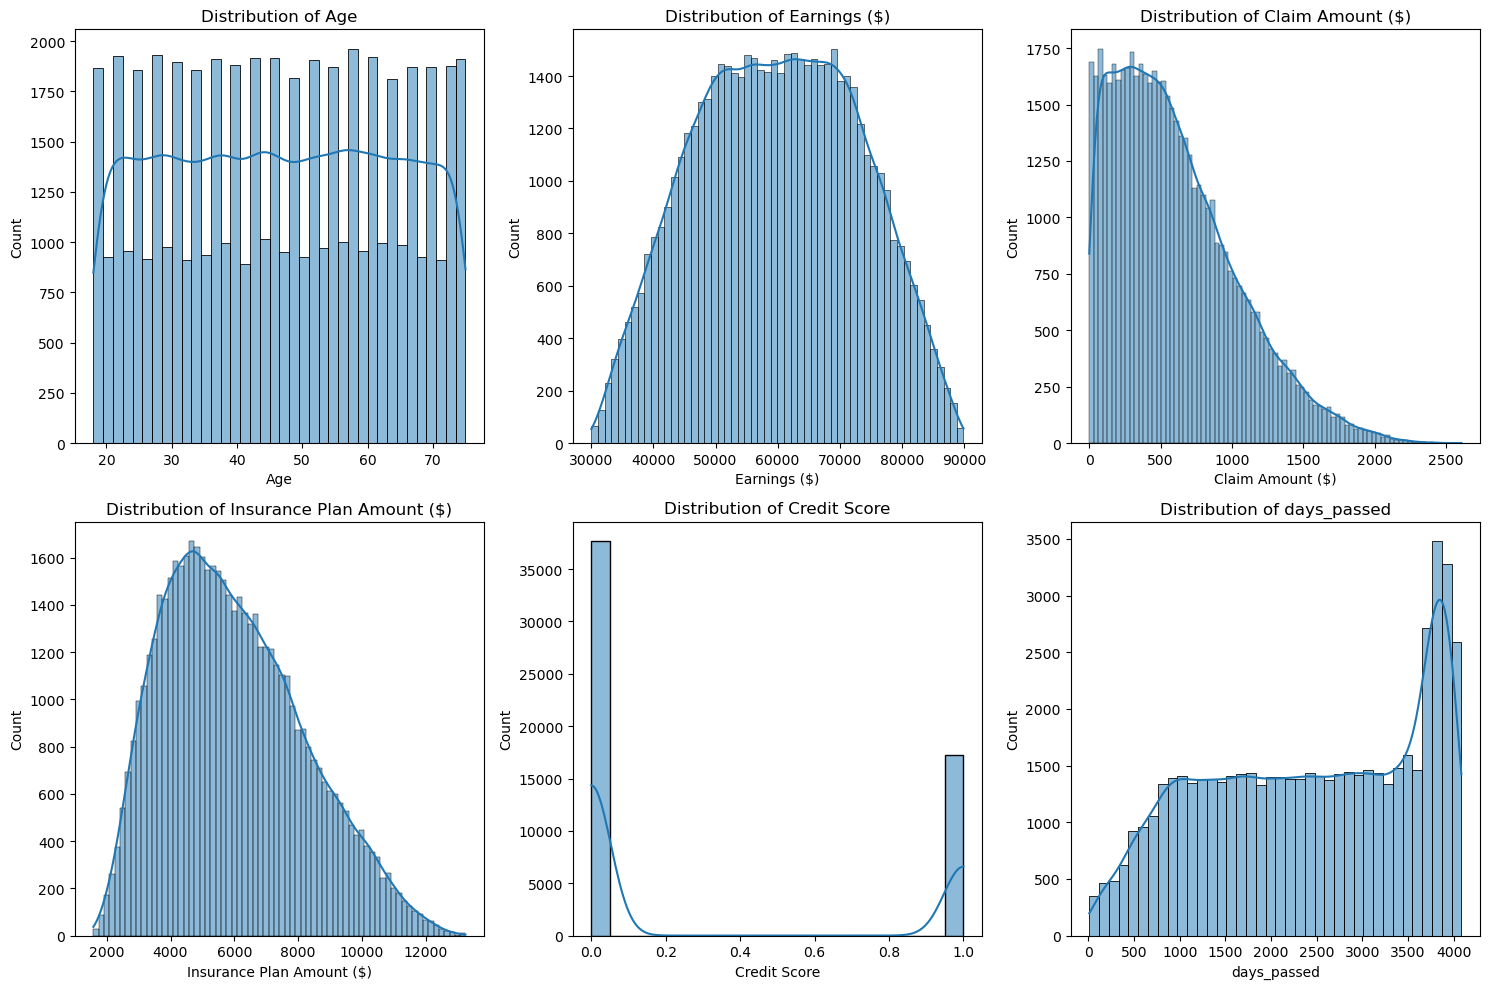

In [25]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'Earnings ($)', 'Claim Amount ($)', 'Insurance Plan Amount ($)', 'Credit Score', 'days_passed']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


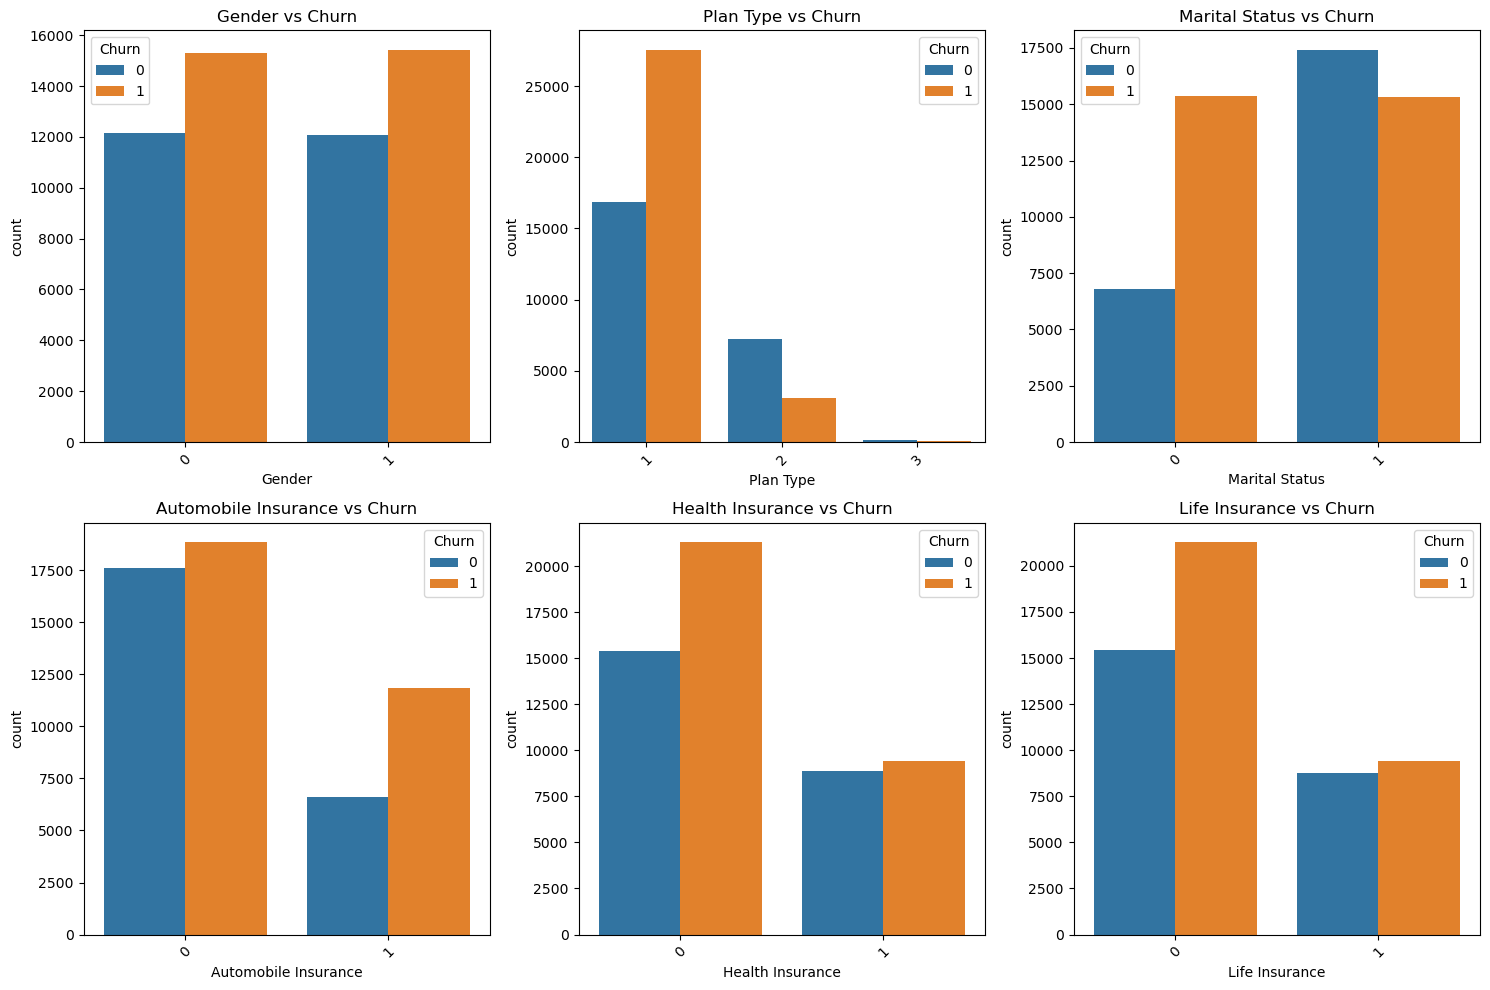

In [26]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Gender', 'Plan Type', 'Marital Status', 'Automobile Insurance', 'Health Insurance', 'Life Insurance']):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

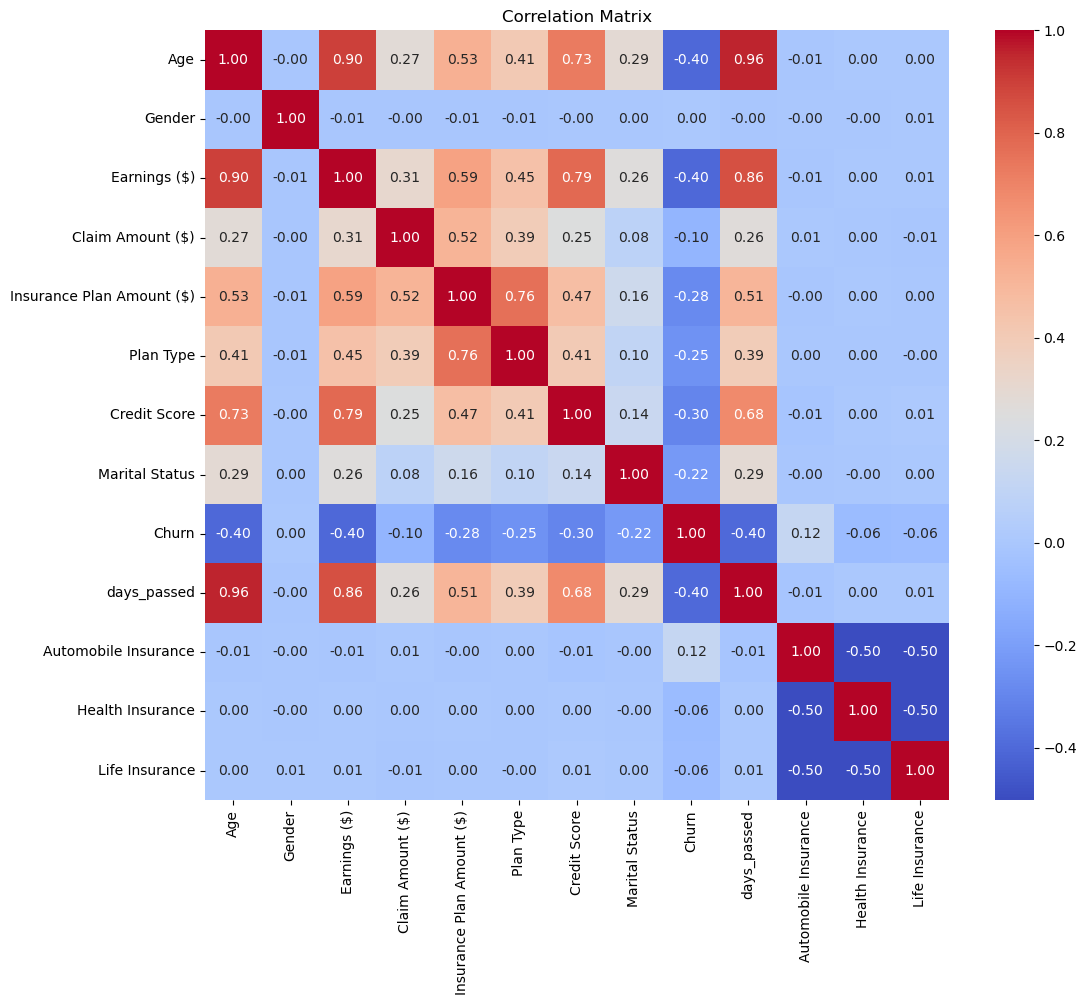

In [27]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

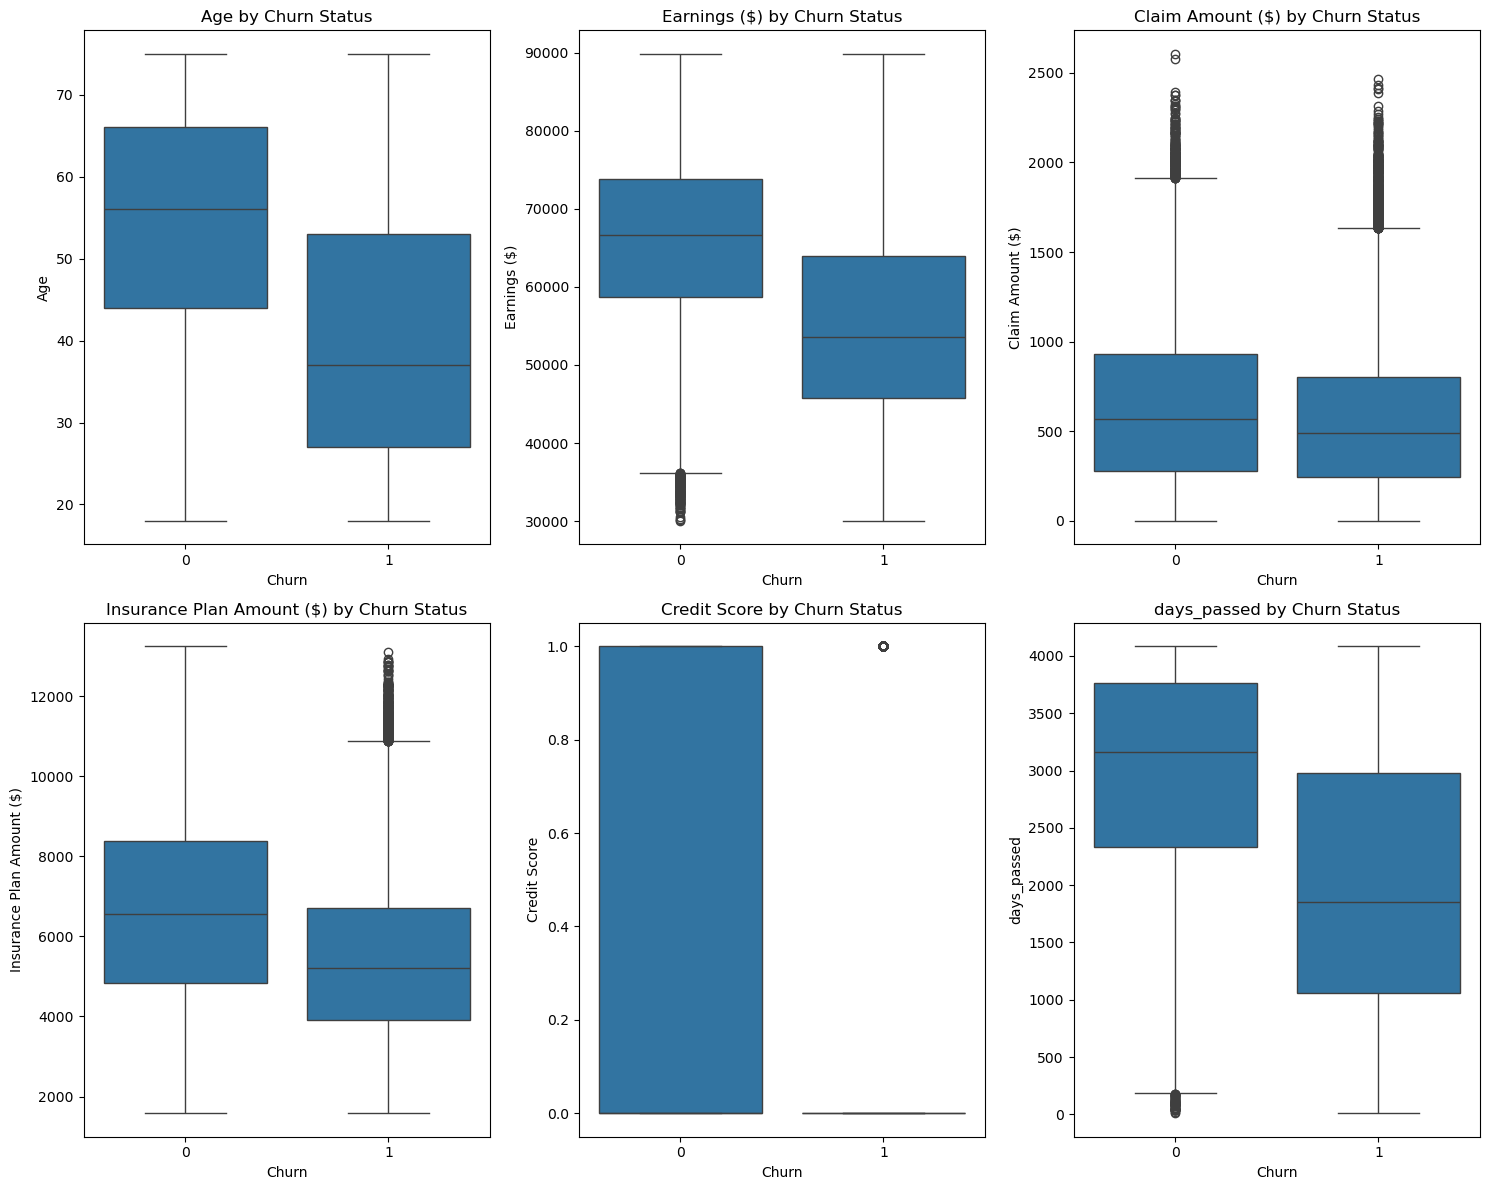

In [28]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(['Age', 'Earnings ($)', 'Claim Amount ($)', 'Insurance Plan Amount ($)', 'Credit Score', 'days_passed']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn Status')
plt.tight_layout()
plt.show()

In [29]:
def count_outliers(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Count outliers
    n_outliers = len(outliers)
    
    return n_outliers

In [30]:
def drop_outliers(df, column):
    """
    Returns:
    pandas.DataFrame: DataFrame with outliers removed
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_clean = df.copy()
    
    # Calculate Q1, Q3, and IQR
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    # Print information about the outliers removed
    n_outliers = len(df) - len(df_clean)
    percentage = (n_outliers / len(df)) * 100
    print(f"Removed {n_outliers} outliers ({percentage:.2f}%) from column '{column}'")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    return df_clean

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54928 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        54928 non-null  int64  
 1   Gender                     54928 non-null  int64  
 2   Earnings ($)               54928 non-null  float64
 3   Claim Amount ($)           54928 non-null  float64
 4   Insurance Plan Amount ($)  54928 non-null  float64
 5   Plan Type                  54928 non-null  int64  
 6   Credit Score               54928 non-null  int64  
 7   Marital Status             54928 non-null  int64  
 8   Churn                      54928 non-null  int64  
 9   days_passed                54928 non-null  int64  
 10  Automobile Insurance       54928 non-null  int64  
 11  Health Insurance           54928 non-null  int64  
 12  Life Insurance             54928 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 5.9 MB


In [32]:
df = drop_outliers(df , "Claim Amount ($)")

Removed 807 outliers (1.47%) from column 'Claim Amount ($)'
Lower bound: -635.3474999999999, Upper bound: 1752.9125


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54121 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        54121 non-null  int64  
 1   Gender                     54121 non-null  int64  
 2   Earnings ($)               54121 non-null  float64
 3   Claim Amount ($)           54121 non-null  float64
 4   Insurance Plan Amount ($)  54121 non-null  float64
 5   Plan Type                  54121 non-null  int64  
 6   Credit Score               54121 non-null  int64  
 7   Marital Status             54121 non-null  int64  
 8   Churn                      54121 non-null  int64  
 9   days_passed                54121 non-null  int64  
 10  Automobile Insurance       54121 non-null  int64  
 11  Health Insurance           54121 non-null  int64  
 12  Life Insurance             54121 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 5.8 MB


In [34]:
df['Plan Type'].value_counts()

Plan Type
1    44404
2     9586
3      131
Name: count, dtype: int64

In [35]:
# Print original distribution
print("Original Plan Type distribution:")
print(df['Plan Type'].value_counts())

# Separate features and target
X = df.drop('Plan Type', axis=1)  # Features (all columns except Plan Type)
y = df['Plan Type']               # Target (Plan Type)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced dataframe
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Plan Type'] = y_resampled

# Check the new distribution
print("\nBalanced Plan Type distribution after SMOTE:")
print(df_balanced['Plan Type'].value_counts())

# Keep using the balanced dataframe for further analysis
df = df_balanced

# Verify the shape of the new dataframe
print(f"\nNew dataframe shape: {df.shape}")

Original Plan Type distribution:
Plan Type
1    44404
2     9586
3      131
Name: count, dtype: int64

Balanced Plan Type distribution after SMOTE:
Plan Type
1    44404
2    44404
3    44404
Name: count, dtype: int64

New dataframe shape: (133212, 13)


In [36]:
df["Churn"].value_counts()

Churn
0    94888
1    38324
Name: count, dtype: int64

In [37]:
# Print original distribution
print("Original Churn distribution:")
print(df['Churn'].value_counts())

# Separate features and target
X = df.drop('Churn', axis=1)  # Features (all columns except Churn)
y = df['Churn']               # Target (Churn)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced dataframe
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Churn'] = y_resampled

# Check the new distribution
print("\nBalanced Churn distribution after SMOTE:")
print(df_balanced['Churn'].value_counts())

# Keep using the balanced dataframe for further analysis
df = df_balanced

# Verify the shape of the new dataframe
print(f"\nNew dataframe shape: {df.shape}")

Original Churn distribution:
Churn
0    94888
1    38324
Name: count, dtype: int64

Balanced Churn distribution after SMOTE:
Churn
0    94888
1    94888
Name: count, dtype: int64

New dataframe shape: (189776, 13)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189776 entries, 0 to 189775
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        189776 non-null  int64  
 1   Gender                     189776 non-null  int64  
 2   Earnings ($)               189776 non-null  float64
 3   Claim Amount ($)           189776 non-null  float64
 4   Insurance Plan Amount ($)  189776 non-null  float64
 5   Credit Score               189776 non-null  int64  
 6   Marital Status             189776 non-null  int64  
 7   days_passed                189776 non-null  int64  
 8   Automobile Insurance       189776 non-null  int64  
 9   Health Insurance           189776 non-null  int64  
 10  Life Insurance             189776 non-null  int64  
 11  Plan Type                  189776 non-null  int64  
 12  Churn                      189776 non-null  int64  
dtypes: float64(3), int64(10)
memo

In [39]:
df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type,Churn
0,58,1,68668.48,429.30,7412.89,1,0,3971,0,1,0,1,0
1,54,0,68156.42,290.84,5205.74,1,0,3641,0,0,1,1,1
2,48,1,53127.39,1077.28,7966.00,0,1,2563,0,1,0,1,1
3,35,1,60871.42,723.11,9007.93,0,1,1631,0,1,0,2,0
4,30,0,42120.27,73.66,4563.14,0,0,1827,0,1,0,1,1


In [40]:
# df.to_csv("preprocessed.csv" , index_label = False)

Churn Predictor

In [41]:
y = df['Churn']
X = df.drop("Churn" , axis = 1)

In [42]:
cols_to_scale = ['Age' , 'Earnings ($)' , 'Claim Amount ($)' , 'Insurance Plan Amount ($)' ]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [45]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
model = LinearSVC(dual = 'auto')
model.fit(X_train , y_train)
preds = model.predict(X_test)
print(classification_report(y_test , preds))


              precision    recall  f1-score   support

           0       0.75      0.79      0.77     28510
           1       0.78      0.74      0.76     28423

    accuracy                           0.76     56933
   macro avg       0.76      0.76      0.76     56933
weighted avg       0.76      0.76      0.76     56933



In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     28510
           1       0.89      0.90      0.89     28423

    accuracy                           0.89     56933
   macro avg       0.89      0.89      0.89     56933
weighted avg       0.89      0.89      0.89     56933



Plan type recommender for churning custormers

In [47]:
df = pd.read_csv("preprocessed.csv")
df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type,Churn
0,58,1,68668.48,429.30,7412.89,1,0,3967,0,1,0,1,0
1,54,0,68156.42,290.84,5205.74,1,0,3637,0,0,1,1,1
2,48,1,53127.39,1077.28,7966.00,0,1,2559,0,1,0,1,1
3,35,1,60871.42,723.11,9007.93,0,1,1627,0,1,0,2,0
4,30,0,42120.27,73.66,4563.14,0,0,1823,0,1,0,1,1


In [48]:
churn_df = df[df['Churn'] == 1].copy()

In [49]:
churn_df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type,Churn
1,54,0,68156.42,290.84,5205.74,1,0,3637,0,0,1,1,1
2,48,1,53127.39,1077.28,7966.00,0,1,2559,0,1,0,1,1
4,30,0,42120.27,73.66,4563.14,0,0,1823,0,1,0,1,1
5,42,0,48759.48,718.59,5173.58,0,0,2178,0,1,0,1,1
6,44,1,55269.45,269.78,5000.97,0,1,1986,1,0,0,1,1


In [50]:
churn_df.drop("Churn" , axis = 1 , inplace = True)

In [51]:
churn_df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type
1,54,0,68156.42,290.84,5205.74,1,0,3637,0,0,1,1
2,48,1,53127.39,1077.28,7966.00,0,1,2559,0,1,0,1
4,30,0,42120.27,73.66,4563.14,0,0,1823,0,1,0,1
5,42,0,48759.48,718.59,5173.58,0,0,2178,0,1,0,1
6,44,1,55269.45,269.78,5000.97,0,1,1986,1,0,0,1


In [52]:
churn_df2 = churn_df.copy()

In [53]:
churn_df2[cols_to_scale] = scaler.transform(churn_df2[cols_to_scale])

In [54]:
churn_df2.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type
1,-0.008814,0,0.028780,-0.960619,-0.928750,1,0,3637,0,0,1,1
2,-0.345824,1,-0.947034,0.771822,-0.080255,0,1,2559,0,1,0,1
4,-1.356853,0,-1.661711,-1.439043,-1.126283,0,0,1823,0,1,0,1
5,-0.682834,0,-1.230636,-0.018333,-0.938636,0,0,2178,0,1,0,1
6,-0.570497,1,-0.807953,-1.007012,-0.991696,0,1,1986,1,0,0,1


In [55]:
churn_df2["Predicted_Churn"] = model.predict(churn_df2)
churn_df2.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type,Predicted_Churn
1,-0.008814,0,0.028780,-0.960619,-0.928750,1,0,3637,0,0,1,1,1
2,-0.345824,1,-0.947034,0.771822,-0.080255,0,1,2559,0,1,0,1,1
4,-1.356853,0,-1.661711,-1.439043,-1.126283,0,0,1823,0,1,0,1,1
5,-0.682834,0,-1.230636,-0.018333,-0.938636,0,0,2178,0,1,0,1,1
6,-0.570497,1,-0.807953,-1.007012,-0.991696,0,1,1986,1,0,0,1,1


In [56]:
churn_df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type
1,54,0,68156.42,290.84,5205.74,1,0,3637,0,0,1,1
2,48,1,53127.39,1077.28,7966.00,0,1,2559,0,1,0,1
4,30,0,42120.27,73.66,4563.14,0,0,1823,0,1,0,1
5,42,0,48759.48,718.59,5173.58,0,0,2178,0,1,0,1
6,44,1,55269.45,269.78,5000.97,0,1,1986,1,0,0,1


In [57]:
churn_df['Plan Type'].value_counts()

Plan Type
1    68522
2    14862
3    11504
Name: count, dtype: int64

In [58]:
X = churn_df.drop("Plan Type"  , axis = 1)
y = churn_df["Plan Type"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
scaler2 = StandardScaler()
X_train[cols_to_scale] = scaler2.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler2.transform(X_test[cols_to_scale])

In [61]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
model2 = LinearSVC(dual = 'auto')
model2.fit(X_train , y_train)
preds2 = model2.predict(X_test)
print(classification_report(y_test , preds2))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98     20594
           2       1.00      0.76      0.86      4420
           3       0.93      1.00      0.96      3453

    accuracy                           0.96     28467
   macro avg       0.96      0.92      0.94     28467
weighted avg       0.96      0.96      0.96     28467



Plan type recommender for non churning customers

In [62]:
df = pd.read_csv("preprocessed.csv")
df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type,Churn
0,58,1,68668.48,429.30,7412.89,1,0,3967,0,1,0,1,0
1,54,0,68156.42,290.84,5205.74,1,0,3637,0,0,1,1,1
2,48,1,53127.39,1077.28,7966.00,0,1,2559,0,1,0,1,1
3,35,1,60871.42,723.11,9007.93,0,1,1627,0,1,0,2,0
4,30,0,42120.27,73.66,4563.14,0,0,1823,0,1,0,1,1


In [63]:
non_churn_df = df[df['Churn'] == 0].copy()

In [64]:
non_churn_df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type,Churn
0,58,1,68668.48,429.30,7412.89,1,0,3967,0,1,0,1,0
3,35,1,60871.42,723.11,9007.93,0,1,1627,0,1,0,2,0
7,32,0,52375.04,170.61,5457.85,0,1,888,0,0,1,1,0
12,38,1,46984.91,202.05,4604.42,0,1,2191,0,1,0,1,0
14,51,1,60369.17,794.14,8306.65,0,1,2740,1,0,0,2,0


In [65]:
non_churn_df.drop("Churn" , axis = 1 , inplace = True)

In [66]:
non_churn_df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type
0,58,1,68668.48,429.30,7412.89,1,0,3967,0,1,0,1
3,35,1,60871.42,723.11,9007.93,0,1,1627,0,1,0,2
7,32,0,52375.04,170.61,5457.85,0,1,888,0,0,1,1
12,38,1,46984.91,202.05,4604.42,0,1,2191,0,1,0,1
14,51,1,60369.17,794.14,8306.65,0,1,2740,1,0,0,2


In [67]:
non_churn_df2 = non_churn_df.copy()

In [68]:
non_churn_df2[cols_to_scale] = scaler.transform(non_churn_df2[cols_to_scale])

In [69]:
non_churn_df2.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type
0,0.215859,1,0.062027,-0.655607,-0.250280,1,0,3967,0,1,0,1
3,-1.076012,1,-0.444225,-0.008376,0.240030,0,1,1627,0,1,0,2
7,-1.244517,0,-0.995883,-1.225472,-0.851253,0,1,888,0,0,1,1
12,-0.907507,1,-1.345856,-1.156214,-1.113594,0,1,2191,0,1,0,1
14,-0.177319,1,-0.476835,0.148096,0.024459,0,1,2740,1,0,0,2


In [70]:
non_churn_df2["Predicted_Churn"] = model.predict(non_churn_df2)
non_churn_df2.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type,Predicted_Churn
0,0.215859,1,0.062027,-0.655607,-0.250280,1,0,3967,0,1,0,1,0
3,-1.076012,1,-0.444225,-0.008376,0.240030,0,1,1627,0,1,0,2,0
7,-1.244517,0,-0.995883,-1.225472,-0.851253,0,1,888,0,0,1,1,0
12,-0.907507,1,-1.345856,-1.156214,-1.113594,0,1,2191,0,1,0,1,0
14,-0.177319,1,-0.476835,0.148096,0.024459,0,1,2740,1,0,0,2,0


In [71]:
non_churn_df.head()

,Age,Gender,Earnings ($),Claim Amount ($),Insurance Plan Amount ($),Credit Score,Marital Status,days_passed,Automobile Insurance,Health Insurance,Life Insurance,Plan Type
0,58,1,68668.48,429.30,7412.89,1,0,3967,0,1,0,1
3,35,1,60871.42,723.11,9007.93,0,1,1627,0,1,0,2
7,32,0,52375.04,170.61,5457.85,0,1,888,0,0,1,1
12,38,1,46984.91,202.05,4604.42,0,1,2191,0,1,0,1
14,51,1,60369.17,794.14,8306.65,0,1,2740,1,0,0,2


In [72]:
non_churn_df['Plan Type'].value_counts()

Plan Type
3    39679
2    38347
1    16862
Name: count, dtype: int64

In [73]:
X = non_churn_df.drop("Plan Type"  , axis = 1)
y = non_churn_df["Plan Type"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [75]:
scaler3 = StandardScaler()
X_train[cols_to_scale] = scaler3.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler3.transform(X_test[cols_to_scale])

In [76]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
model3 = LinearSVC(dual = 'auto')
model3.fit(X_train , y_train)
preds3 = model3.predict(X_test)
print(classification_report(y_test , preds3))

              precision    recall  f1-score   support

           1       0.95      0.94      0.94      5034
           2       0.97      0.94      0.96     11478
           3       0.97      1.00      0.98     11955

    accuracy                           0.97     28467
   macro avg       0.96      0.96      0.96     28467
weighted avg       0.97      0.97      0.97     28467



Saving models and scalers

inputs are age , gender , earnings , claim amount , insurance plan amount , credit score (binary col) , marital status , days_passed and type of insurance One hot encoded

 cols_to_scale = [Age , Earnings ($) , Claim Amount ($) , Insurance Plan Amount ($) ]

In [77]:
import joblib


For churn models

In [ ]:

joblib.dump(model , "churn_model.pkl")
joblib.dump(scaler , "churn_scaler.pkl")

['churn_scaler.pkl']

For plan type recommender for churning customers

In [79]:
joblib.dump(model2 , "churning_plan_recommender.pkl")
joblib.dump(scaler2 , "churning_plan_recommender_scaler.pkl")

['churning_plan_recommender_scaler.pkl']

In [80]:
joblib.dump(model3 , "non_churning_plan_recommender.pkl")
joblib.dump(scaler3 , "non_churning_plan_recommender_scaler.pkl")

['non_churning_plan_recommender_scaler.pkl']